# Pymaceuticals Inc.
---

### Analysis

Pymaceutical Data Analysis:

The purpose of this analysis is to help Pymaceuticals Inc. and other interested 
parties determine the efficacy of certain 'Drug Regimens' in order to help find 
potential treatments for squamous cell carcinoma (SCC). The data 
provided sufficient evidence of a few points I’d like to speak about in this 
brief summary of the data.

The sources of data used to discover certain trends were mouse metadata, 
i.e.'Mouse ID' classifications, 'Drug Regimen', 'Sex', etc. The study results of 
each mouse was also provided in a separate, readable csv file which helped me 
gain a clearer picture of the overall examination. The 'Drug Regimen' of each 
drug administered to the mice was considered and crossed referenced with the 
'Tumor Volume (3mm)' within each unique mouse. Once a clean DataFrame, with no 
duplicate 'Mouse ID', was established I was able to generate a summary 
statistics table of mean, median, variance, standard deviation, and 
SEM(Standard error of the mean) of the tumor volume for each regimen.

A main focus of my analysis surrounded the drug 'Capomulin' and its results and
effects on this particular studied population. Based on the data, the scatter 
plot, and correlation analysis I observed that the Capomulin regimen indicates 
a positive correlation between mouse weight and average tumor volume. The data 
shows as mouse weight increases, there's a propensity for tumor volume to 
increase. This may suggest that larger mice have larger tumors under the 
Capomulin treatment. I also noticed, while analyzing the box plot for the 
Capomulin regimen, potential outliers, hinting to some variability in tumor 
response among the mice. These outliers may point out that certain mice 
undergoing the Capomulin treatment respond differently, possibly due to 
certain biological variations or other unanticipated factors. Another 
interesting observation was the survival rate of the mice treated with the 
Capomulin regimen. Analyzing this factor revealed that mice treated with 
Capomulin generally displayed higher survival rates compared to other regimens 
throughout the course of the study. This led me to infer Capomulin may have a 
positive impact on the survival of mice, and possibly prolonging survival in the
other subjects within the study. 


In [58]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merging the data into a single DataFrame
mouse_study_data = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')

# Display the data table for preview
mouse_study_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice.
numb_of_mice = mouse_study_data['Mouse ID'].nunique()

print(numb_of_mice)

249


In [57]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_duplicates = mouse_study_data[mouse_study_data.duplicated(['Mouse ID', 'Timepoint'])]

mice_duplicates[['Mouse ID', 'Timepoint']].values


array([['g989', 0],
       ['g989', 5],
       ['g989', 10],
       ['g989', 15],
       ['g989', 20]], dtype=object)

In [5]:
# Get all the data for the duplicate mouse ID.
all_mice_duplicates = mouse_study_data[(mouse_study_data['Mouse ID'].isin(mice_duplicates['Mouse ID']))]

all_mice_duplicates[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_study_data[mouse_study_data['Mouse ID'].isin(mice_duplicates['Mouse ID'])==False]

cleaned_mouse_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
new_numb_of_mice = cleaned_mouse_data['Mouse ID'].nunique()

print(new_numb_of_mice)

248


## Summary Statistics

In [8]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Group by 'Drug Regimen' and calculate summary statistics
tumor_vol_sum_stats = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
tumor_vol_sum_stats = tumor_vol_sum_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Err.'
})

# Display the summary statistics table
tumor_vol_sum_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_vol_sum_stats_single_line = cleaned_mouse_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})
tumor_vol_sum_stats_single_line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

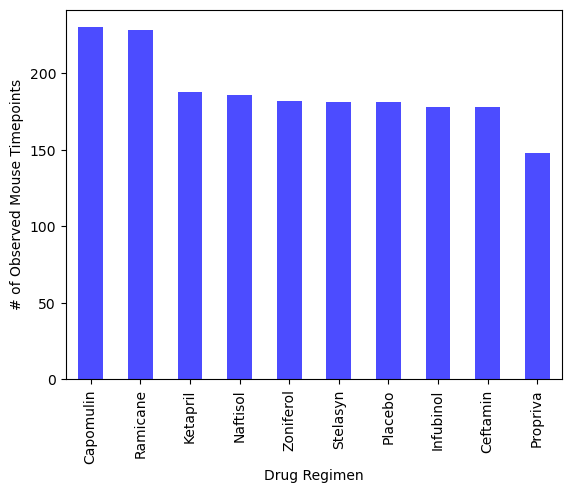

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Counting the number of rows for each drug regimen
drug_reg_count = cleaned_mouse_data['Drug Regimen'].value_counts()

# Plotting the bar chart
drug_reg_count.plot(kind='bar', color='blue', alpha=0.7)

# Adding labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

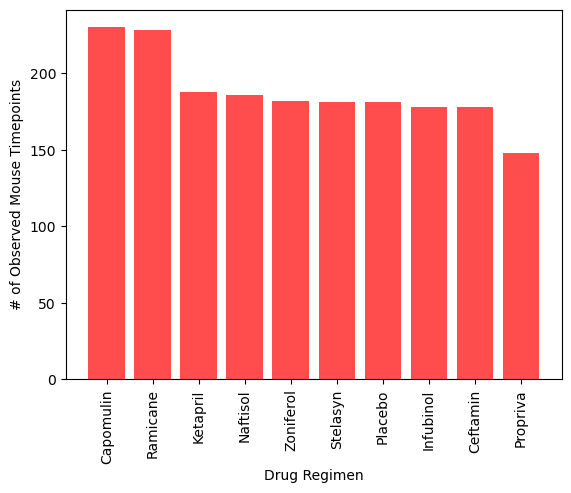

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Counting the number of rows for each drug regimen
drug_reg_count = cleaned_mouse_data['Drug Regimen'].value_counts()

# Creating a bar plot using pyplot
plt.bar(drug_reg_count.index, drug_reg_count, color='red', alpha=0.7)

# Adding labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotating x-axis label for better readability 
plt.xticks(rotation=90)

# Show the plot
plt.show()

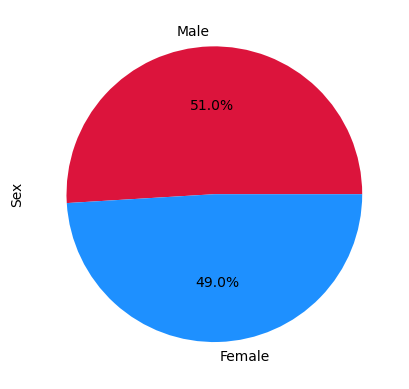

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Counting the number of male and female mice
female_vs_male_dist = cleaned_mouse_data['Sex'].value_counts()

# Plotting the pie chart using Pandas
female_vs_male_dist.plot(kind='pie', autopct='%1.1f%%', colors=['crimson', 'dodgerblue'])

# Adding label
plt.ylabel('Sex')

# Show the plot
plt.show()

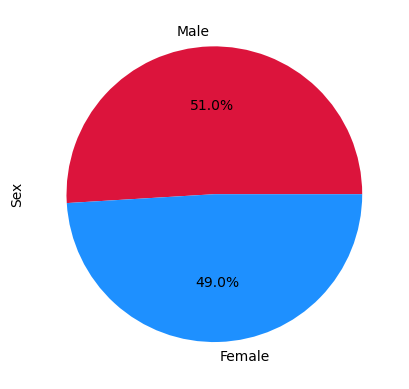

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Counting the number of male and female mice
female_vs_male_dist = cleaned_mouse_data['Sex'].value_counts()

# Creating a pie chart using pyplot
plt.pie(female_vs_male_dist, labels=female_vs_male_dist.index, autopct='%1.1f%%', colors=['crimson', 'dodgerblue'])

# Adding label
plt.ylabel('Sex')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_greatest_timepoint = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'].isin(mouse_treatment_regimens)].groupby('Mouse ID')['Timepoint'].max()

# Created DataFrame with the last (greatest) timepoint information
last_greatest_timepoint_df = pd.DataFrame(last_greatest_timepoint)

# Merging this group df with the original DataFrame to get the tumor volume at the last timepoint
last_greatest_timepoint_tumor_volume = pd.merge(last_greatest_timepoint_df, cleaned_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')

# **Show merged DataFrame
last_greatest_timepoint_tumor_volume[['Mouse ID', 'Timepoint', 'Drug Regimen', 'Tumor Volume (mm3)']].head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
mouse_treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Created an empty list to fill with tumor volume data (for plotting)
tumor_vol_data = []

# Created an empty library to store potential outliers
potential_outliers = {}

# Looping through each treatment regimen
for regimen in mouse_treatment_regimens:
    # Locating the rows which contain mice on the current drug regimen and get the tumor volumes
    regimen_data = last_greatest_timepoint_tumor_volume.loc[last_greatest_timepoint_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)']

    # Adding the subset data to the list for plotting
    tumor_vol_data.append(regimen_data)

    # Calculating quartiles the IQR 
    quartiles = regimen_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    # Determine upper and lower bounds for potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Identifying potential outliers for the current regimen
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]

    # Appending potential outliers to the library
    potential_outliers[regimen] = outliers

# Displaying the combined potential outliers for all regimens    
for regimen, outliers in potential_outliers.items():
    print(f"{regimen}'s Potential Outliers: {outliers}")

Capomulin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


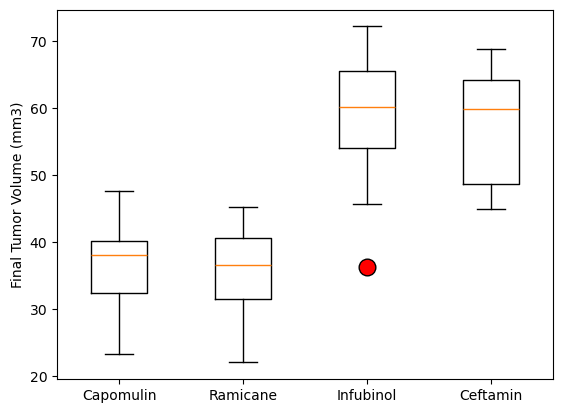

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Setting a specific color for outliers
flierprops = dict(markerfacecolor='red', marker='o', markersize=12)

# Creating a box plot with custom outlier color
plt.boxplot(tumor_vol_data, labels=mouse_treatment_regimens, flierprops=flierprops)

# Adding label
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

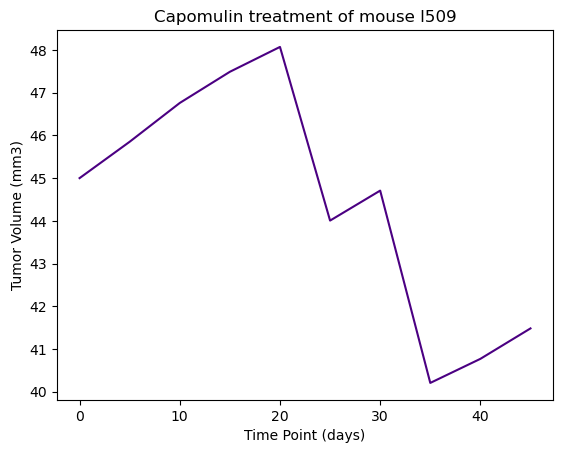

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Chosen mouse ID treated with Capomulin
mouse_id = 'l509'  

# Extracting data for the selected mouse and Capomulin treatment
mouse_id_data = cleaned_mouse_data[(cleaned_mouse_data['Drug Regimen'] == 'Capomulin') & (cleaned_mouse_data['Mouse ID'] == mouse_id)]

# Creating a line plot of tumor volume vs. time point
plt.plot(mouse_id_data['Timepoint'], mouse_id_data['Tumor Volume (mm3)'], linestyle='-', color='indigo')

# Adding labels and title
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

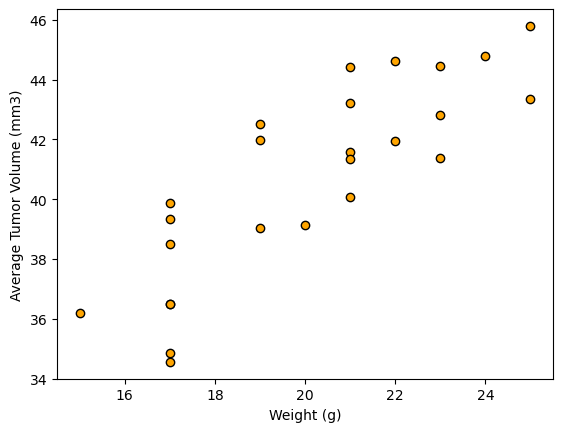

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filtering data for the Capomulin regimen
capomulin_filtered_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']

# Grouping by Mouse ID to calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_filtered_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merging average tumor volume data with mouse metadata to include weights
merged_data = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

# Creating a scatter plot of mouse weight vs. average tumor volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='orange', edgecolors='black')

# Adding labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


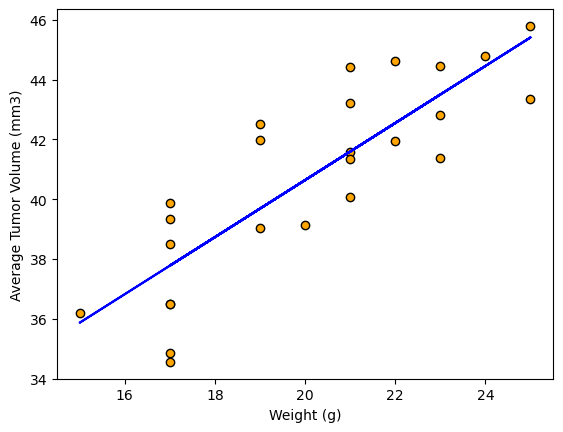

In [47]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculating the correlation coefficient
correlation_coefficient = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0]

# Performing linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Generating predicted values using the linear regression model
predicted_values = slope * merged_data['Weight (g)'] + intercept

# Creating a scatter plot with the regression line
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='orange',edgecolors='black')
plt.plot(merged_data['Weight (g)'], predicted_values, color='blue')

# Adding labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Printing the Correlation between mouse weight and the average tumor volume
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}')

# Show the plot
plt.show()